# Predict Caediovascular Diseases


Models which we have applied on our dataset are:

* Random Forest Model
* Decision Tree Model
* K-Nearest Neighbours Model

Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


Read Dataset

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 K

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
# Print number of rows in data
print(data.shape)

(299, 13)


In [4]:
# Size and shape of dataset
print(data.size)

3887


In [5]:
# Prints Summary of Data
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# SPLITING DATA
Data for training and testing
To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 5% ( aims to reduce the overfitting effect).

In [7]:
from sklearn.model_selection import train_test_split
Y = data['DEATH_EVENT']
X = data.drop(columns=['DEATH_EVENT'])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [9]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (254, 12)
Y train shape:  (254,)
X test shape:  (45, 12)
Y test shape:  (45,)


# 1. Random forest classification



* Random Forest With MinMaxScaler

              precision    recall  f1-score   support

  Predicated       0.91      0.83      0.87        36
      Actual       0.50      0.67      0.57         9

    accuracy                           0.80        45
   macro avg       0.70      0.75      0.72        45
weighted avg       0.83      0.80      0.81        45



<Axes: >

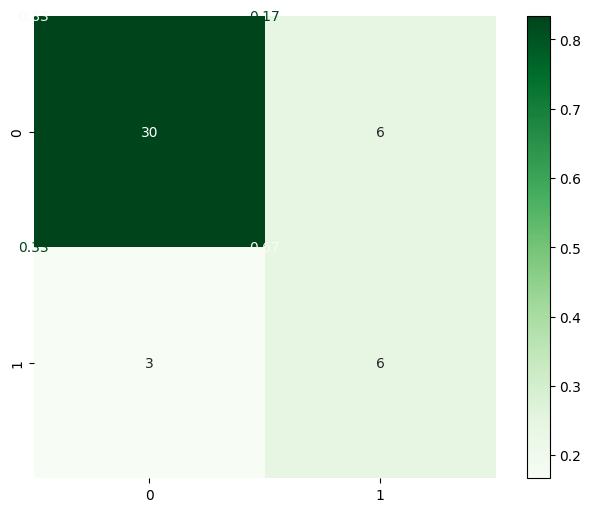

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=4)

# We train model
rfcla.fit(X_train_min, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test_min)

target_names = ['Predicated','Actual']
print(classification_report(y_test, Y_predict5.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, Y_predict5.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, Y_predict5)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)


* Random Forest with PCA Scalar

              precision    recall  f1-score   support

  Predicated       0.79      0.83      0.81        36
      Actual       0.14      0.11      0.12         9

    accuracy                           0.69        45
   macro avg       0.47      0.47      0.47        45
weighted avg       0.66      0.69      0.67        45



<Axes: >

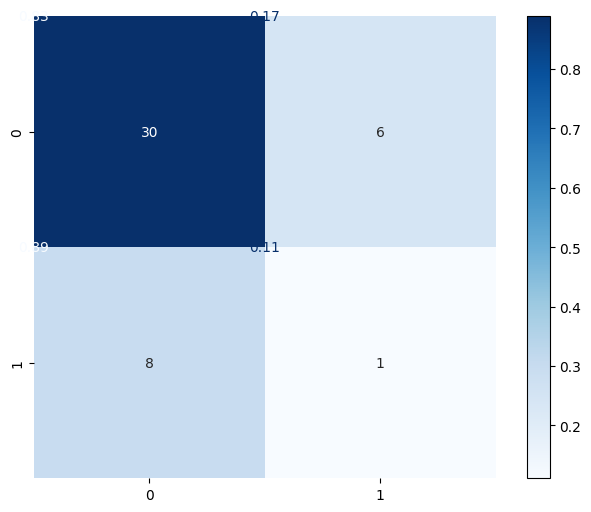

In [11]:
from sklearn.preprocessing import StandardScaler   #  used for optimization purposes
independent_scaler= StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.fit_transform(X_test)

from sklearn.decomposition import PCA
pca =PCA(n_components =2 )
# Convert all the columns into two components / columns
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca  = pca.fit_transform(X_test_norm)
X_test_pca = pca.transform(X_test_norm)


# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=4)

# We train model
rfcla.fit(X_train_pca, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test_pca)

target_names = ['Predicated','Actual']
print(classification_report(y_test, Y_predict5.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, Y_predict5.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, Y_predict5)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

 # 2. Decision Tree 

* Decision Tree with MinMaxScaler

              precision    recall  f1-score   support

  Predicated       0.89      0.69      0.78        36
      Actual       0.35      0.67      0.46         9

    accuracy                           0.69        45
   macro avg       0.62      0.68      0.62        45
weighted avg       0.78      0.69      0.72        45



<Axes: >

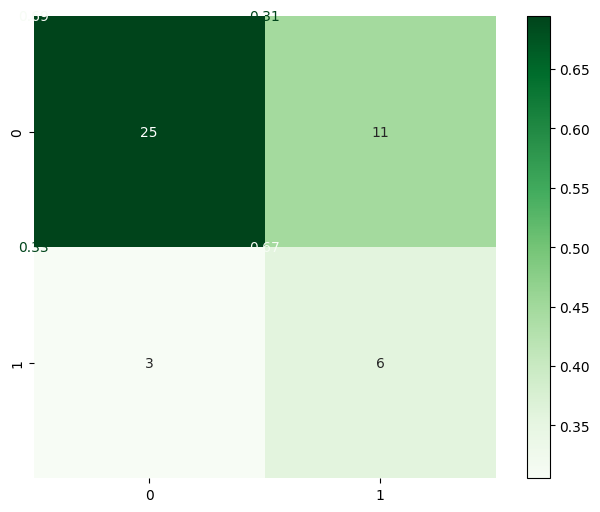

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree Model
dt = DecisionTreeClassifier()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)
# We fit our model with our train data
dt.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_min)


target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

* Decision Tree PCA Scalar

              precision    recall  f1-score   support

  Predicated       0.82      0.86      0.84        36
      Actual       0.29      0.22      0.25         9

    accuracy                           0.73        45
   macro avg       0.55      0.54      0.54        45
weighted avg       0.71      0.73      0.72        45



<Axes: >

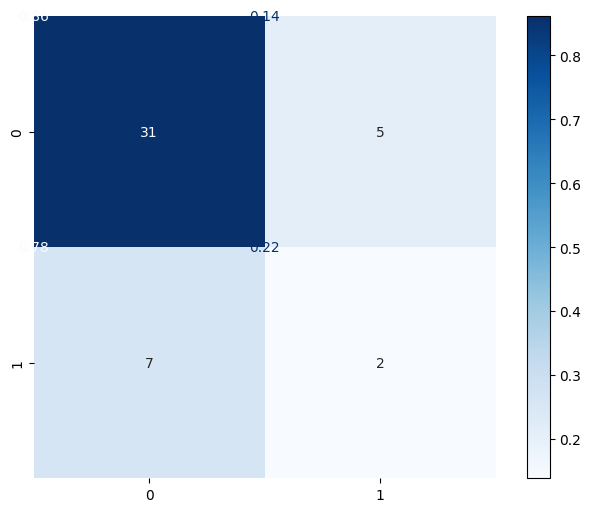

In [13]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_pca)

target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# 3. KNN 

* Knn with MinMaxScaler

              precision    recall  f1-score   support

  Predicated       0.91      0.86      0.89        36
      Actual       0.55      0.67      0.60         9

    accuracy                           0.82        45
   macro avg       0.73      0.76      0.74        45
weighted avg       0.84      0.82      0.83        45



<Axes: >

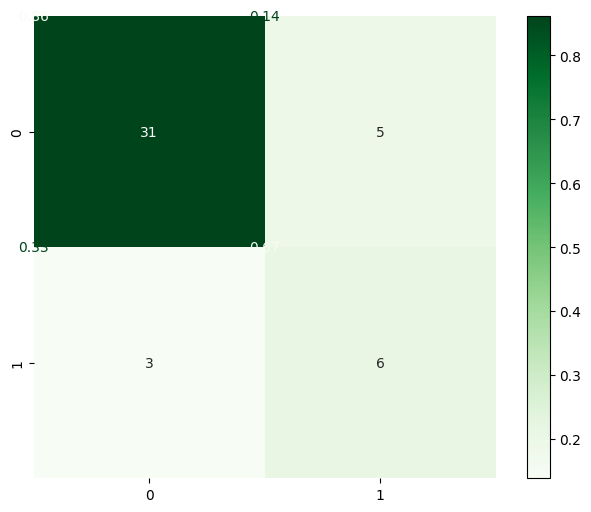

In [14]:
from sklearn.neighbors import KNeighborsClassifier

mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_min)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

* knn with PCA Scalar

              precision    recall  f1-score   support

  Predicated       0.79      0.75      0.77        36
      Actual       0.18      0.22      0.20         9

    accuracy                           0.64        45
   macro avg       0.49      0.49      0.49        45
weighted avg       0.67      0.64      0.66        45



<Axes: >

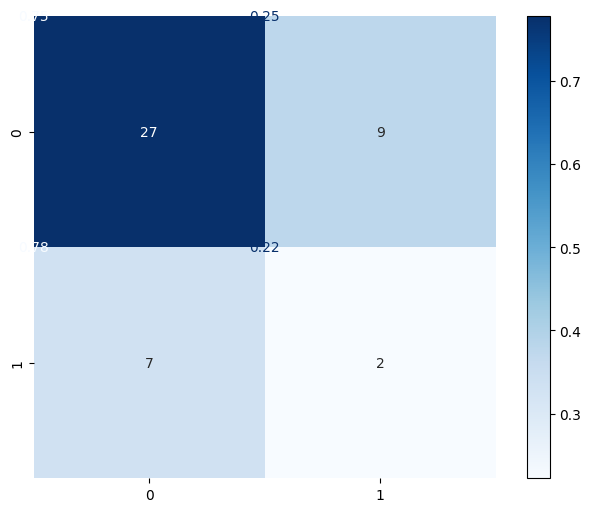

In [15]:
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_pca)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [16]:
models = []
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.733333
1   DT  0.755556
2   RF  0.888889


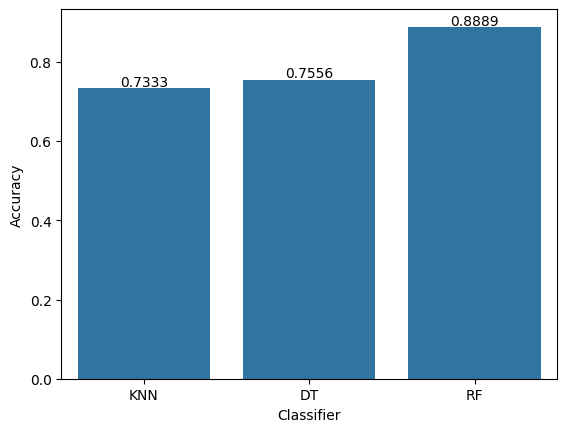

In [17]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()